In [11]:
import models.TD as TD
from env.obs_grid import ObsGrid
import matplotlib.pyplot as plt

In [12]:
env = ObsGrid(
        grid_size=(10, 10),
        start=(0, 0),
        goal=(9, 9),
        obstacles=[(1, 1), (2, 2), (3, 3), (4, 4)]
    )

In [13]:
args = TD.Args(
    lr = 0.1,
    gamma = 0.9,
    epsilon = 0.05,
    train_episodes = 1000
)
n_actions = env.action_space.n
agent_q_learning = TD.QLearning(n_actions, args)
agent_sarsa = TD.Sarsa(n_actions, args)

In [14]:
def train(env:ObsGrid,
          agent,
          train_episodes):
    rewards = []
    ma_rewards = []
    for episode in range(train_episodes):
        state = env.reset() 
        episode_reward = 0
        while True:
            action = agent.choose_action(state)
            next_state, reward, done, _ =  env.step(action)
            if isinstance(agent, TD.Sarsa):
                next_action = agent.choose_action(next_state)
                agent.update(state, action, reward, next_state, next_action, done)
            elif isinstance(agent, TD.QLearning):
                agent.update(state, action, reward, next_state, done)
            state = next_state
            episode_reward += reward
            if done:
                break
        rewards.append(episode_reward)
        if ma_rewards:
            ma_rewards.append(agent.gamma * ma_rewards[-1] + agent.lr * episode_reward)
        else:
            ma_rewards.append(episode_reward)
        if (episode + 1) % 20 == 0:
            print(f"Episode {episode + 1}: Total Reward: {episode_reward}")
    return rewards, ma_rewards



Episode 20: Total Reward: -46
Episode 40: Total Reward: 54
Episode 60: Total Reward: 72
Episode 80: Total Reward: 62
Episode 100: Total Reward: 63
Episode 120: Total Reward: 67
Episode 140: Total Reward: 73
Episode 160: Total Reward: 80
Episode 180: Total Reward: 81
Episode 200: Total Reward: 79
Episode 220: Total Reward: 82
Episode 240: Total Reward: 83
Episode 260: Total Reward: 80
Episode 280: Total Reward: 83
Episode 300: Total Reward: 78
Episode 320: Total Reward: 83
Episode 340: Total Reward: 83
Episode 360: Total Reward: 83
Episode 380: Total Reward: 81
Episode 400: Total Reward: 81
Episode 420: Total Reward: 81
Episode 440: Total Reward: 83
Episode 460: Total Reward: 82
Episode 480: Total Reward: 83
Episode 500: Total Reward: 83
Episode 520: Total Reward: 81
Episode 540: Total Reward: 83
Episode 560: Total Reward: 81
Episode 580: Total Reward: 83
Episode 600: Total Reward: 81
Episode 620: Total Reward: 81
Episode 640: Total Reward: 82
Episode 660: Total Reward: 83
Episode 680: 

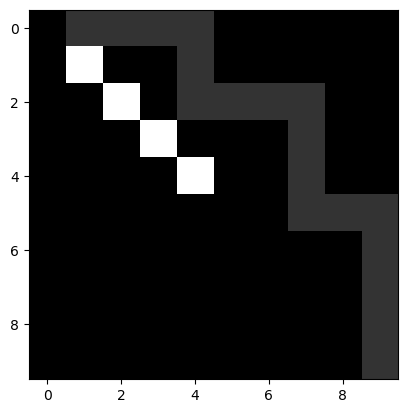

[[0.  0.2 0.2 0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.2 0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.2 0.2 0.2 0.2 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]]


In [15]:
env.reset()
agent_q_learning = TD.QLearning(n_actions, args)
reward, ma_reward = train(env, agent_q_learning, args.train_episodes)
env.render()
print(env.grid)

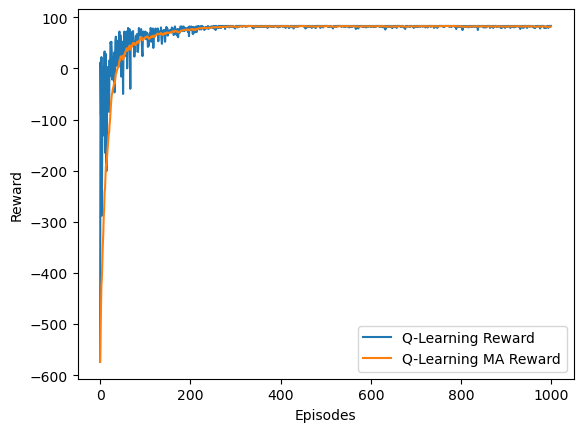

In [16]:
plt.figure()
plt.plot(reward, label="Q-Learning Reward")
plt.plot(ma_reward, label="Q-Learning MA Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

Episode 20: Total Reward: -64
Episode 40: Total Reward: 21
Episode 60: Total Reward: 66
Episode 80: Total Reward: 32
Episode 100: Total Reward: 79
Episode 120: Total Reward: 67
Episode 140: Total Reward: 72
Episode 160: Total Reward: 66
Episode 180: Total Reward: 79
Episode 200: Total Reward: 82
Episode 220: Total Reward: 78
Episode 240: Total Reward: 76
Episode 260: Total Reward: 79
Episode 280: Total Reward: 82
Episode 300: Total Reward: 82
Episode 320: Total Reward: 83
Episode 340: Total Reward: 83
Episode 360: Total Reward: 83
Episode 380: Total Reward: 83
Episode 400: Total Reward: 81
Episode 420: Total Reward: 83
Episode 440: Total Reward: 80
Episode 460: Total Reward: 81
Episode 480: Total Reward: 83
Episode 500: Total Reward: 83
Episode 520: Total Reward: 81
Episode 540: Total Reward: 81
Episode 560: Total Reward: 83
Episode 580: Total Reward: 83
Episode 600: Total Reward: 83
Episode 620: Total Reward: 81
Episode 640: Total Reward: 79
Episode 660: Total Reward: 81
Episode 680: 

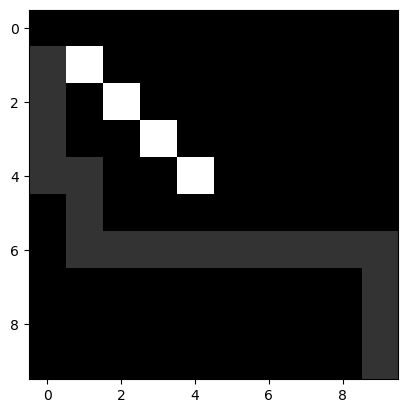

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]]


In [17]:
env.reset()
agent_q_learning = TD.Sarsa(n_actions, args)
reward, ma_reward = train(env, agent_q_learning, args.train_episodes)
env.render()
print(env.grid)

In [ ]:
plt.figure()
plt.plot(reward, label="Sarsa Reward")
plt.plot(ma_reward, label="Sarsa MA Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()